In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ecom=pd.read_csv("Data.csv",encoding="ISO-8859-1")

In [3]:
ecom.shape

(250981, 8)

In [4]:
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250981 entries, 0 to 250980
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    250981 non-null  object 
 1   StockCode    250981 non-null  object 
 2   Description  250044 non-null  object 
 3   Quantity     250980 non-null  float64
 4   InvoiceDate  250980 non-null  object 
 5   UnitPrice    250980 non-null  float64
 6   CustomerID   180138 non-null  float64
 7   Country      250980 non-null  object 
dtypes: float64(3), object(5)
memory usage: 15.3+ MB


In [6]:
#changing the datatype of InvoiceDate to datetime
ecom['InvoiceDate']=pd.to_datetime(ecom['InvoiceDate'],format='mixed')

In [7]:
#missing value check
ecom.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,937
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,70843
Country,1


In [8]:
temp=ecom[['StockCode','Description']] # Creating a temporary DataFrame with only the StockCode and Description columns to focus on handling missing Description values.

In [9]:
temp2=temp[temp['Description'].isna()] # Filtering rows where the Description field is missing (NaN) and storing it in temp2.

In [10]:
# first non-null description of stock code ,Creating a DataFrame (stock_des) that contains the first non-null Description for each unique StockCode, which will be used to fill missing descriptions.
stock_des=ecom.groupby('StockCode',as_index=False).agg({'Description': 'first'})

In [11]:
stock_des.isna().sum()

,0
StockCode,0
Description,108


In [12]:
# Merging the original dataset (ecom) with stock_des to replace missing descriptions based on the StockCode.
ecom2=ecom.merge(stock_des , left_on='StockCode',right_on="StockCode")

In [13]:
# Dropping the old Description_x column (from the original ecom) to avoid duplication, keeping only the Description_y (from the merged DataFrame).

ecom2.drop('Description_x',axis=1,inplace=True)

In [14]:
# Filling any remaining missing descriptions with "Unknown Description" to ensure no missing values remain in the Description_y column
ecom2.fillna({'Description_y':'Unknown Description'},inplace=True)

In [15]:
# Checking again for any remaining missing values after the cleaning process
ecom2.isna().sum()

,0
InvoiceNo,0
StockCode,0
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,70843
Country,1
Description_y,0


In [16]:
 # Extracting the rows where CustomerID is missing and storing the corresponding InvoiceDate in a temporary DataFrame (temp3)
 temp3=ecom2[ecom2['CustomerID'].isna()]['InvoiceDate'].reset_index()

In [17]:
temp3

,index,InvoiceDate
0,622,2010-12-01 11:52:00
1,1443,2010-12-01 14:32:00
2,1444,2010-12-01 14:32:00
3,1445,2010-12-01 14:32:00
4,1446,2010-12-01 14:32:00
...,...,...
70838,250976,2011-07-05 16:47:00
70839,250977,2011-07-05 16:47:00
70840,250978,2011-07-05 16:47:00
70841,250979,2011-07-05 16:47:00


In [18]:
temp3.groupby('InvoiceDate').ngroups

1762

In [19]:
temp3['UniqueIndex']=temp3.groupby('InvoiceDate').ngroup()+1
temp3['UniqueIndex']=temp3['UniqueIndex'].astype("str")

In [20]:
def unknown (x):
  return "Unknown Customer"+" "+ x

In [21]:
temp3['customer_type']=temp3['UniqueIndex'].apply(unknown)

In [22]:
temp3.drop('UniqueIndex',axis=1,inplace=True)

In [23]:
temp=ecom2.groupby('InvoiceDate',as_index=False).agg({'CustomerID': 'first'})

In [24]:
temp['customerID']=temp['CustomerID'].fillna("Unknown Customer")

In [25]:
temp.drop('CustomerID',axis=1,inplace=True)

In [26]:
ecom3=ecom2.merge(temp,left_on='InvoiceDate',right_on="InvoiceDate",how="left")

In [27]:
ecom3.drop('CustomerID',axis=1,inplace=True)


Handling duplicate values

In [28]:
ecom3.duplicated().sum()

2063

In [29]:
ecom3.drop_duplicates(inplace=True)
ecom3.duplicated().sum()

0

# **Step 2 : EDA**

In this step we will explore the data
- Univariate Analysis
- Bivariate Analysis
- Outlier detect


In [30]:
ecom3.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Description_y,customerID
0,536365,85123A,6.0,2010-12-01 08:26:00,2.55,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,17850.0
1,536365,71053,6.0,2010-12-01 08:26:00,3.39,United Kingdom,WHITE METAL LANTERN,17850.0
2,536365,84406B,8.0,2010-12-01 08:26:00,2.75,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17850.0
3,536365,84029G,6.0,2010-12-01 08:26:00,3.39,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0
4,536365,84029E,6.0,2010-12-01 08:26:00,3.39,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,17850.0


In [31]:
ecom3.describe()

,Quantity,InvoiceDate,UnitPrice
count,248917.000000,248917,248917.00000
mean,9.366697,2011-03-17 03:50:14.778420224,5.09131
min,-74215.000000,2010-12-01 08:26:00,0.00000
25%,1.000000,2011-01-18 17:34:00,1.25000
50%,3.000000,2011-03-20 11:52:00,2.10000
75%,10.000000,2011-05-12 19:33:00,4.21000
max,74215.000000,2011-07-05 16:47:00,38970.00000
std,219.196571,NaN,117.87202


In [32]:
ecom3['Day']=ecom3['InvoiceDate'].dt.day_name()

In [33]:
ecom3['hour']=ecom3['InvoiceDate'].dt.hour
ecom3

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Description_y,customerID,Day,hour
0,536365,85123A,6.0,2010-12-01 08:26:00,2.55,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,Wednesday,8.0
1,536365,71053,6.0,2010-12-01 08:26:00,3.39,United Kingdom,WHITE METAL LANTERN,17850.0,Wednesday,8.0
2,536365,84406B,8.0,2010-12-01 08:26:00,2.75,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17850.0,Wednesday,8.0
3,536365,84029G,6.0,2010-12-01 08:26:00,3.39,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,Wednesday,8.0
4,536365,84029E,6.0,2010-12-01 08:26:00,3.39,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,17850.0,Wednesday,8.0
...,...,...,...,...,...,...,...,...,...,...
250976,559051,85177,6.0,2011-07-05 16:47:00,0.79,United Kingdom,BASKET OF FLOWERS SEWING KIT,Unknown Customer,Tuesday,16.0
250977,559051,85178,5.0,2011-07-05 16:47:00,0.79,United Kingdom,VICTORIAN SEWING KIT,Unknown Customer,Tuesday,16.0
250978,559051,85194S,6.0,2011-07-05 16:47:00,0.63,United Kingdom,HANGING SPRING FLOWER EGG SMALL,Unknown Customer,Tuesday,16.0
250979,559051,85208,1.0,2011-07-05 16:47:00,1.63,United Kingdom,SET/12 FUNKY FELT FLOWER PEG IN BAG,Unknown Customer,Tuesday,16.0


In [34]:
ecom3['Month']=ecom3['InvoiceDate'].dt.month_name()

In [35]:
def order_category(x):
  if x<0 :
    return "return"
  elif x>0:
    return "Delivered"

ecom3['Order_category']=ecom3['Quantity'].apply(order_category)

In [36]:
ecom3['Order_category'].value_counts()

,count
Order_category,
Delivered,243591
return,5326


<Axes: xlabel='Order_category', ylabel='count'>

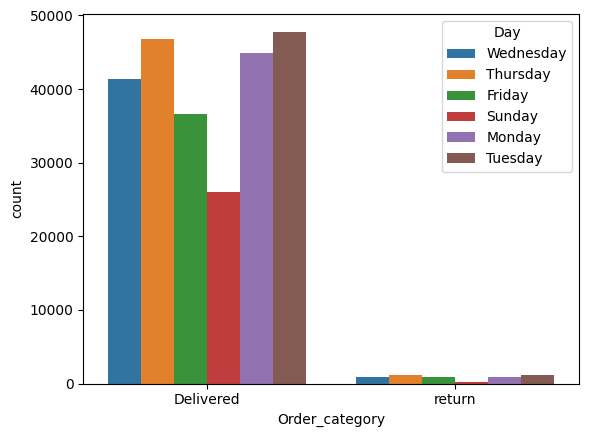

In [37]:
import seaborn as sns
sns.countplot(data=ecom3,x='Order_category',hue='Day')

In [38]:
ecom3['Day'].value_counts(normalize=True)

,proportion
Day,
Tuesday,0.196640
Thursday,0.192968
Monday,0.184198
Wednesday,0.169936
Friday,0.150837
Sunday,0.105421


<Axes: xlabel='Day', ylabel='count'>

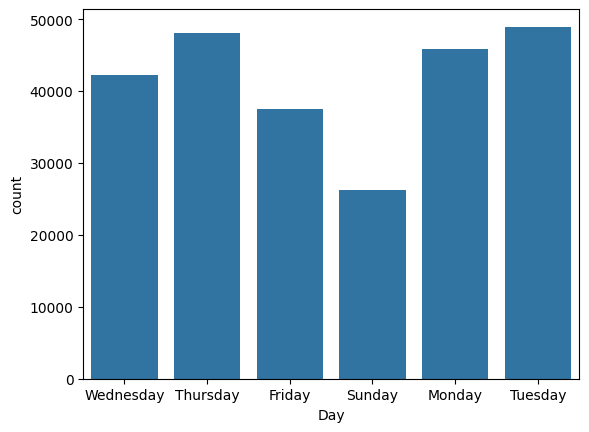

In [39]:
# Preferred Shopping Days
sns.countplot(data=ecom3,x='Day')

<Axes: xlabel='hour', ylabel='count'>

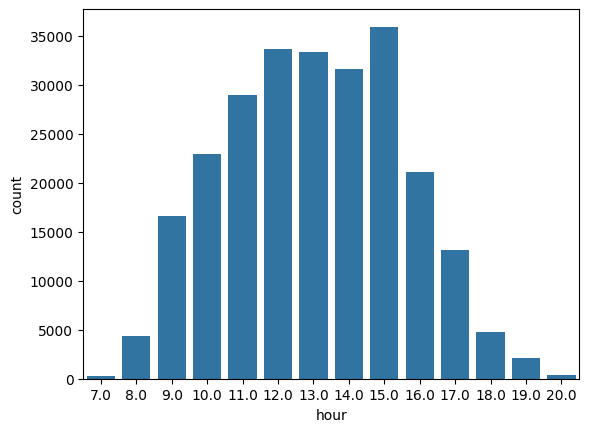

In [40]:
# peak hours
sns.countplot(data=ecom3,x='hour')

In [41]:
ecom3['hour'].value_counts(normalize=True)

,proportion
hour,
15.0,0.144293
12.0,0.135057
13.0,0.134049
14.0,0.126954
11.0,0.116115
10.0,0.091954
16.0,0.084663
9.0,0.066504
17.0,0.052696


In [42]:
ecom3['Amount']=ecom3['Quantity']*ecom3['UnitPrice']

In [43]:
grp_month=ecom3.groupby('Month')['Amount'].sum().reset_index()


<Axes: xlabel='Month', ylabel='Amount'>

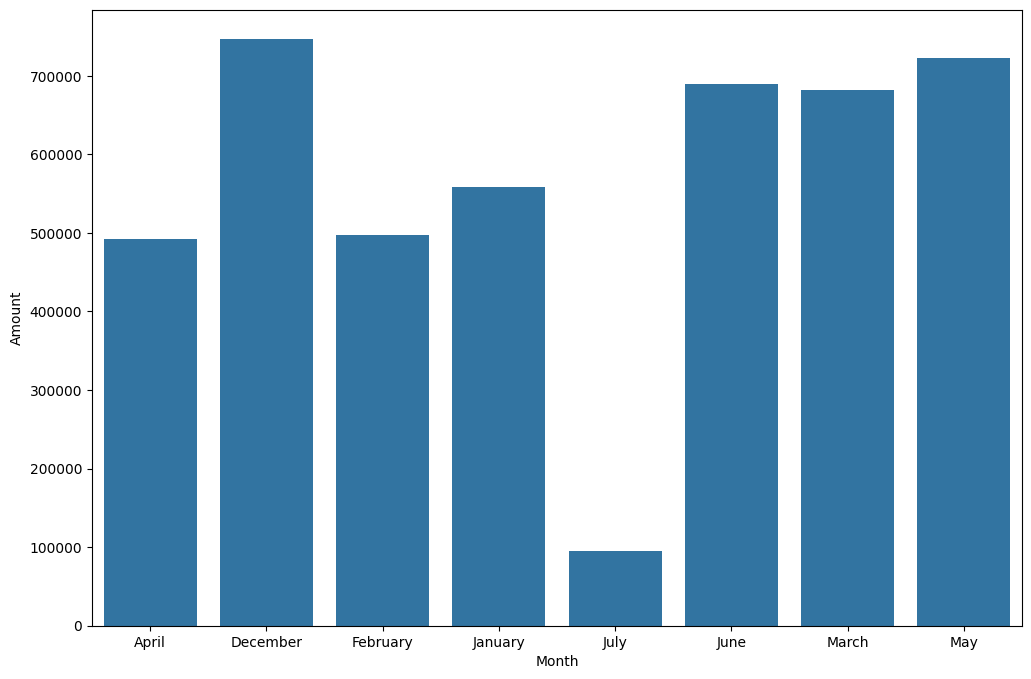

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.barplot(data=grp_month,x="Month",y="Amount")

In [45]:
ecom3['Month'].value_counts(normalize=True)

,proportion
Month,
December,0.168655
May,0.147764
June,0.147073
March,0.146390
January,0.140207
April,0.119321
February,0.110394
July,0.020195


In [46]:
# most ordered product
grp_description=ecom3.groupby('Description_y')['Quantity'].sum().reset_index()

<Axes: xlabel='Description_y'>

<Figure size 1400x1600 with 0 Axes>

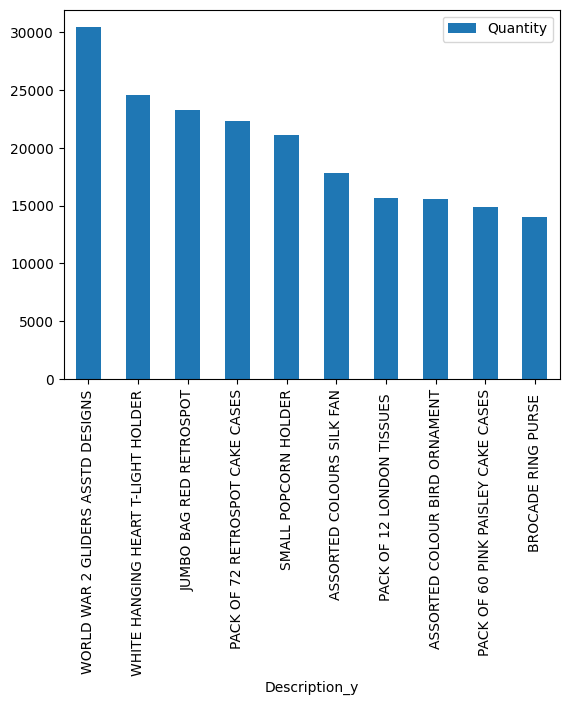

In [47]:
#top 10 products ordered basis quantity
plt.figure(figsize=(14,16))
grp_description.sort_values('Quantity',ascending=False).head(10).set_index('Description_y').plot(kind='bar')

In [48]:
ecom3_delivered=ecom3[ecom3['Order_category']=="Delivered"]


# **Customer segmentation basis Recency , frequency and Monetary**

Calculating the monetary value of each customer

In [49]:
monetary=ecom3_delivered.groupby('customerID')['Amount'].sum().reset_index()


Calculating the frequency for each customer , how many times a customer order

In [50]:
grp1=ecom3_delivered.groupby('customerID')['InvoiceDate'].agg({'max','min'}).reset_index()

In [51]:
grp2=ecom3_delivered.groupby('customerID')['InvoiceNo'].nunique().reset_index()


In [52]:
grp2

,customerID,InvoiceNo
0,12346.0,1
1,12347.0,3
2,12348.0,3
3,12350.0,1
4,12352.0,4
...,...,...
2892,18273.0,1
2893,18281.0,1
2894,18283.0,7
2895,18287.0,1


In [53]:
merged=grp1.merge(grp2)
merged['min_date']=merged['min'].dt.date
merged['max_date']=merged['max'].dt.date

In [54]:
merged.rename({'InvoiceNo':"number_orders"},axis=1,inplace=True)
merged.drop(['min','max'],axis=1,inplace=True)


In [55]:
merged['min_date']=pd.to_datetime(merged['min_date'])
merged['max_date']=pd.to_datetime(merged['max_date'])


In [56]:
merged

,customerID,number_orders,min_date,max_date
0,12346.0,1,2011-01-18,2011-01-18
1,12347.0,3,2011-01-26,2011-06-09
2,12348.0,3,2010-12-16,2011-04-05
3,12350.0,1,2011-02-02,2011-02-02
4,12352.0,4,2011-02-16,2011-03-17
...,...,...,...,...
2892,18273.0,1,2011-03-27,2011-03-27
2893,18281.0,1,2011-06-12,2011-06-12
2894,18283.0,7,2011-01-06,2011-06-23
2895,18287.0,1,2011-05-22,2011-05-22


In [57]:
merged['days']=(merged['max_date']-merged['min_date'])/ np.timedelta64(1, 'D')
merged['months']=(merged['days']/30.44).astype('int')+1
merged['frequency']=merged['number_orders']/merged['months']
merged['frequency']=np.round(merged['frequency'],2)


In [58]:
merged

,customerID,number_orders,min_date,max_date,days,months,frequency
0,12346.0,1,2011-01-18,2011-01-18,0.0,1,1.00
1,12347.0,3,2011-01-26,2011-06-09,134.0,5,0.60
2,12348.0,3,2010-12-16,2011-04-05,110.0,4,0.75
3,12350.0,1,2011-02-02,2011-02-02,0.0,1,1.00
4,12352.0,4,2011-02-16,2011-03-17,29.0,1,4.00
...,...,...,...,...,...,...,...
2892,18273.0,1,2011-03-27,2011-03-27,0.0,1,1.00
2893,18281.0,1,2011-06-12,2011-06-12,0.0,1,1.00
2894,18283.0,7,2011-01-06,2011-06-23,168.0,6,1.17
2895,18287.0,1,2011-05-22,2011-05-22,0.0,1,1.00


# **Recency**

In [59]:
ref_date=merged['max_date'].max()+pd.Timedelta(days=1)


In [60]:
def func(x):
  return (ref_date-x)

merged['recency']=merged['max_date'].apply(func)

In [61]:
merged

,customerID,number_orders,min_date,max_date,days,months,frequency,recency
0,12346.0,1,2011-01-18,2011-01-18,0.0,1,1.00,169 days
1,12347.0,3,2011-01-26,2011-06-09,134.0,5,0.60,27 days
2,12348.0,3,2010-12-16,2011-04-05,110.0,4,0.75,92 days
3,12350.0,1,2011-02-02,2011-02-02,0.0,1,1.00,154 days
4,12352.0,4,2011-02-16,2011-03-17,29.0,1,4.00,111 days
...,...,...,...,...,...,...,...,...
2892,18273.0,1,2011-03-27,2011-03-27,0.0,1,1.00,101 days
2893,18281.0,1,2011-06-12,2011-06-12,0.0,1,1.00,24 days
2894,18283.0,7,2011-01-06,2011-06-23,168.0,6,1.17,13 days
2895,18287.0,1,2011-05-22,2011-05-22,0.0,1,1.00,45 days


In [62]:
rfm=monetary.merge(merged)
rfm[['customerID','Amount','frequency','recency']]

,customerID,Amount,frequency,recency
0,12346.0,77183.60,1.00,169 days
1,12347.0,1494.16,0.60,27 days
2,12348.0,1487.24,0.75,92 days
3,12350.0,334.40,1.00,154 days
4,12352.0,1401.48,4.00,111 days
...,...,...,...,...
2892,18273.0,51.00,1.00,101 days
2893,18281.0,80.82,1.00,24 days
2894,18283.0,1248.16,1.17,13 days
2895,18287.0,765.28,1.00,45 days


# **CALCULATING THE RFM SCORES**

In [63]:
rfm['monetary_score']=pd.qcut(rfm['Amount'],[0,0.20,0.4,0.6,0.8,1],labels=False)+1

In [64]:
rfm['frequency_score']=pd.qcut(rfm['frequency'],[0,0.20,0.4,0.6,0.8,1],labels=False,duplicates='drop')+1

In [65]:
rfm['recency_score']=pd.qcut(rfm['recency'],[0,0.20,0.4,0.6,0.8,1],labels=[5,4,3,2,1])


In [66]:
# taking the average of monetary and frequency score
rfm['fm_score']=np.round((rfm['frequency_score'].astype('int')+rfm['monetary_score'])/2,0)

# **Categorizing Customers**

In [67]:
# categorizing the customers basis score
def categorize_customer(row):

  if row['recency_score'] in [4,5] and row['fm_score']==4:
    return "Champions"

  elif row['recency_score'] in [3,4,5] and row['fm_score'] in [3,4]:
    return 'Loyal Customers'
  elif row['recency_score'] in [3,4,5] and row['fm_score'] in [3,2]:
    return 'Potential Loyalists'
  elif row['recency_score']==5 and row['fm_score']==1:
    return 'Recent Customers'
  elif row['recency_score'] in[3,4] and row['fm_score']==1:
    return 'Promising'
  elif row['recency_score'] in[3,2] and row['fm_score'] in [2,3]:
    return 'Customers Needing Attention'
  elif row['recency_score'] ==2  and row['fm_score'] ==1 :
    return 'About To Sleep'
  elif row['recency_score'] in[2,1] and row['fm_score'] in [3,4] :
    return 'At Risk'
  elif row['recency_score'] ==1  and row['fm_score'] ==4 :
    return 'Cannot loose them'
  elif row['recency_score'] ==1  and row['fm_score'] ==2 :
    return 'Hibernating'
  elif row['recency_score'] ==1  and row['fm_score'] ==1 :
    return 'Lost'

In [68]:
rfm['customer_category']=rfm.apply(categorize_customer,axis=1)

rfm['customer_category'].value_counts()

,count
customer_category,
Potential Loyalists,904
Customers Needing Attention,477
Hibernating,443
Champions,437
Loyal Customers,399
At Risk,223
Promising,6
About To Sleep,5
Recent Customers,3


In [69]:

rfm['customer_category'].value_counts(normalize=True)

,proportion
customer_category,
Potential Loyalists,0.312047
Customers Needing Attention,0.164653
Hibernating,0.152917
Champions,0.150846
Loyal Customers,0.137729
At Risk,0.076976
Promising,0.002071
About To Sleep,0.001726
Recent Customers,0.001036


In [70]:
!pip install squarify
import squarify

Text(0.5, 1.0, 'Customer Segmentation -RFM Model')

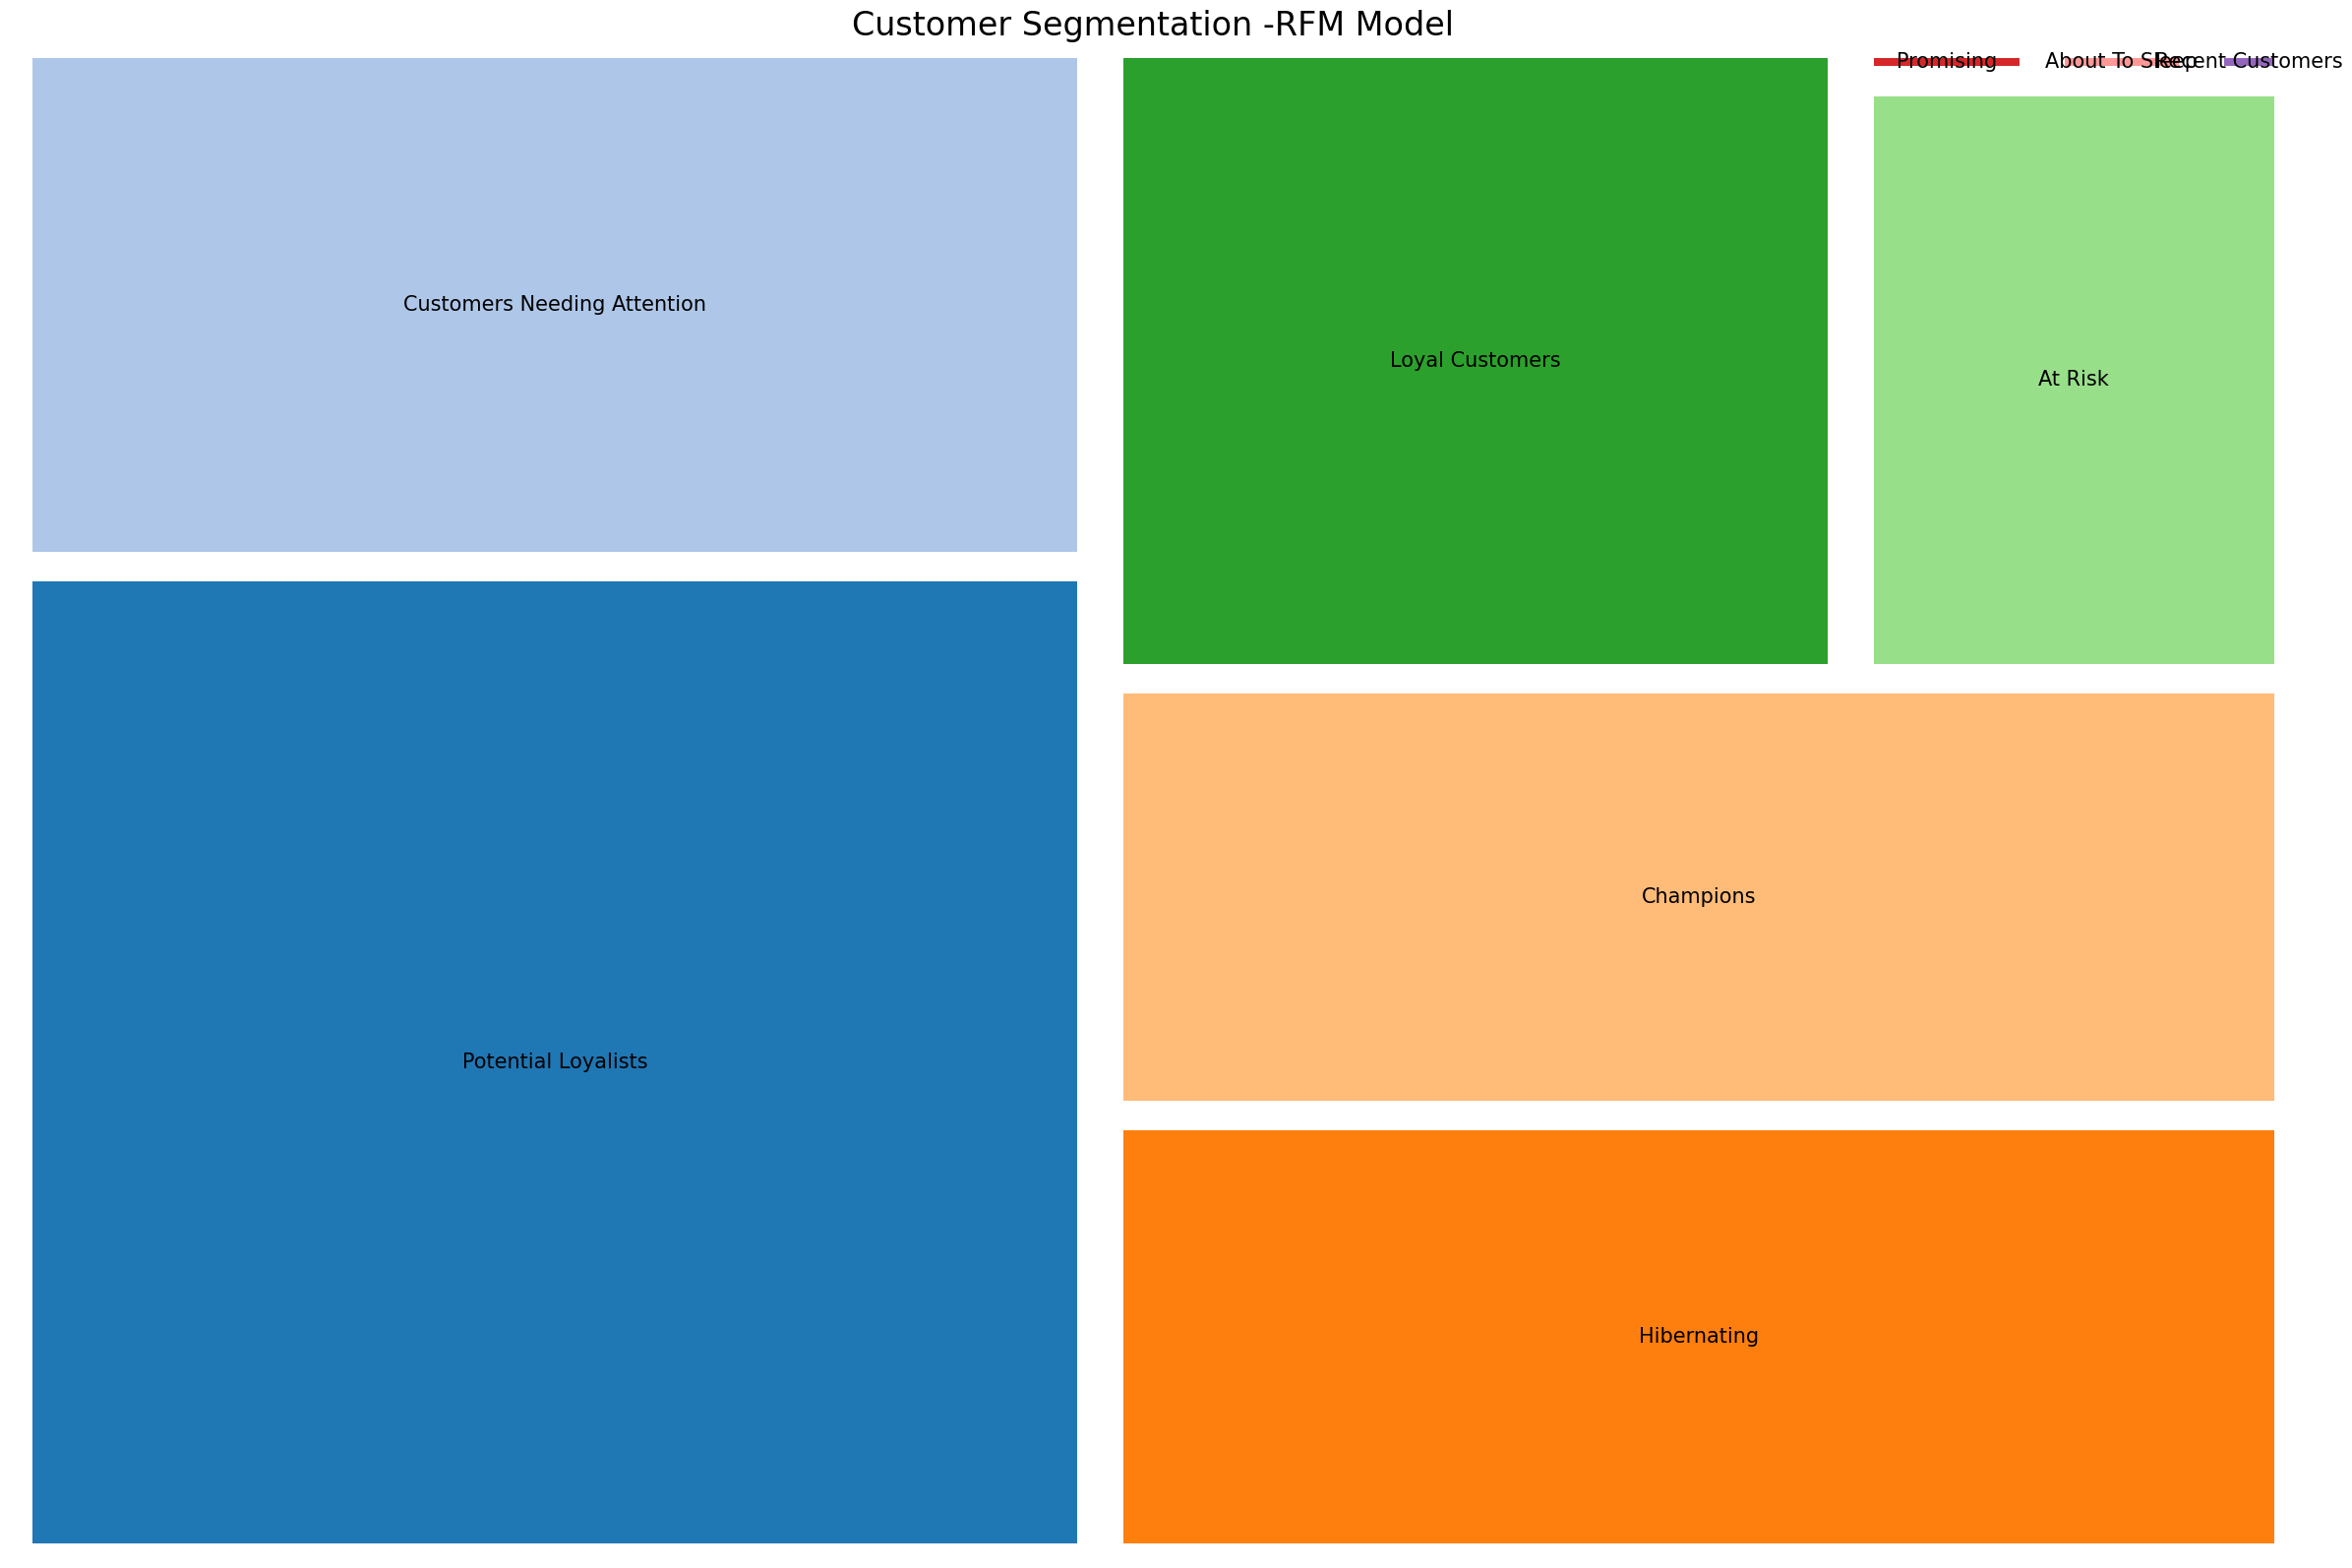

In [71]:
import seaborn as sb
plt.figure(figsize=(30, 20))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(rfm['customer_category'].value_counts(),
                     label=rfm['customer_category'].value_counts().index,
                     color=sb.color_palette("tab20", len(
                         rfm['customer_category'].value_counts())),
                     pad=1,
                     text_kwargs={'fontsize': 15})
axis.set_title("Customer Segmentation -RFM Model", fontsize=24)

# **RECOMMENDATIONS**

In [72]:
def marketing_actions(row):
  if row['customer_category']=='Champions':
    return "Offer exclusive deals and first hand information of new product items added in menu. Share testimonials of these customers over social media. Will promote your brand"
  elif row['customer_category']=='Loyal Customers':
    return "Upsell high ticket size items and seek reviews"
  elif row['customer_category']=='Potential Loyalists':
    return "Provide incentives to join your loyalty program and Send personalized recommendations based on their past orders"
  elif row['customer_category']=='Recent Customers':
    return "Send a welcome email with a discount on their next order & introduce them to your best-selling  items"
  elif row['customer_category']=='Promising ':
    return "Share stories about your brand and the quality of your products & Offer trial discounts"
  elif row['customer_category']=="Customers Needing Attention":
    return "Send time-sensitive discounts to encourage immediate action & recommend products based on their past orders"
  elif row['customer_category']=="About To Sleep":
    return "Highlight popular menu items and limited-time offers and provide special discounts to re-engage them"
  elif row['customer_category']=="At Risk":
    return "Send personalized emails addressing their preferences and previous orders"
  elif row['customer_category']=="Cannot loose them":
    return "Introduce them to new menu items or seasonal specials & engage them through personalized messages and exclusive offers"
  elif row['customer_category']=="Hibernating":
    return "Offer relevant products that align with thier past preferences and special discounts"
  elif row['customer_category']=="Lost":
    return "Revive interest with reach out campaign,ignore otherwise"







rfm['Recommendations']=rfm.apply(marketing_actions,axis=1)